In [2]:
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [3]:
n = 21

In [4]:
h = np.array ([2 / (2 ** (i + 1)) for i in range(21)])

In [17]:
func_names = np.array (["sin (x ** 2)", "cos (sin (x))", "exp (sin (cos ()x))", "ln (x + 3)", "sqrt (x + 3)"])

In [5]:
F = []
F.append (lambda x: np.sin (x ** 2))
F.append (lambda x: np.cos (np.sin (x)))
F.append (lambda x: np.exp (np.sin (np.cos (x))))
F.append (lambda x: np.log (x + 3))
F.append (lambda x: np.sqrt (x + 3))
F = np.array (F)

In [6]:
f = []
f.append (lambda x: 2 * x * np.cos (x ** 2))
f.append (lambda x: - np.sin (np.sin (x)) * np.cos (x))
f.append (lambda x: np.exp (np.sin (np.cos (x))) * np.cos (np.cos (x)) * (- np.sin (x)))
f.append (lambda x: 1 / (x + 3))
f.append (lambda x: 1 / (2 * np.sqrt (x + 3)))
f = np.array (f)

In [7]:
df = []
df.append (lambda f, h, x: (f (x + h) - f(x)) / h)
df.append (lambda f, h, x: (f (x) - f (x - h)) / h)
df.append (lambda f, h, x: (f (x + h) - f (x - h)) / (2 * h))
df.append (lambda f, h, x: (4 / 3) * (f (x + h) - f (x - h)) / (2 * h) - (1 / 3) * (f (x + 2 * h) - f (x - 2 * h)) / (4 * h))
df.append (lambda f, h, x: (3 / 2) * (f (x + h) - f (x - h)) / (2 * h) - (3 / 5) * (f (x + 2 * h) - f (x - 2 * h)) / (4 * h) + (1 / 10) * (f (x + 3 * h) - f (x - 3 * h)) / (6 * h))
df = np.array (df)

In [8]:
X = 2 * np.pi # точка в которой считаем погрешность

In [9]:
y_true = np.array ([g(h) for g in f])
y_calc = np.array ([[g (k, h, X) for g in df] for k in F])

In [10]:
y_diff = abs (y_calc - y_true)

<Figure size 432x288 with 0 Axes>

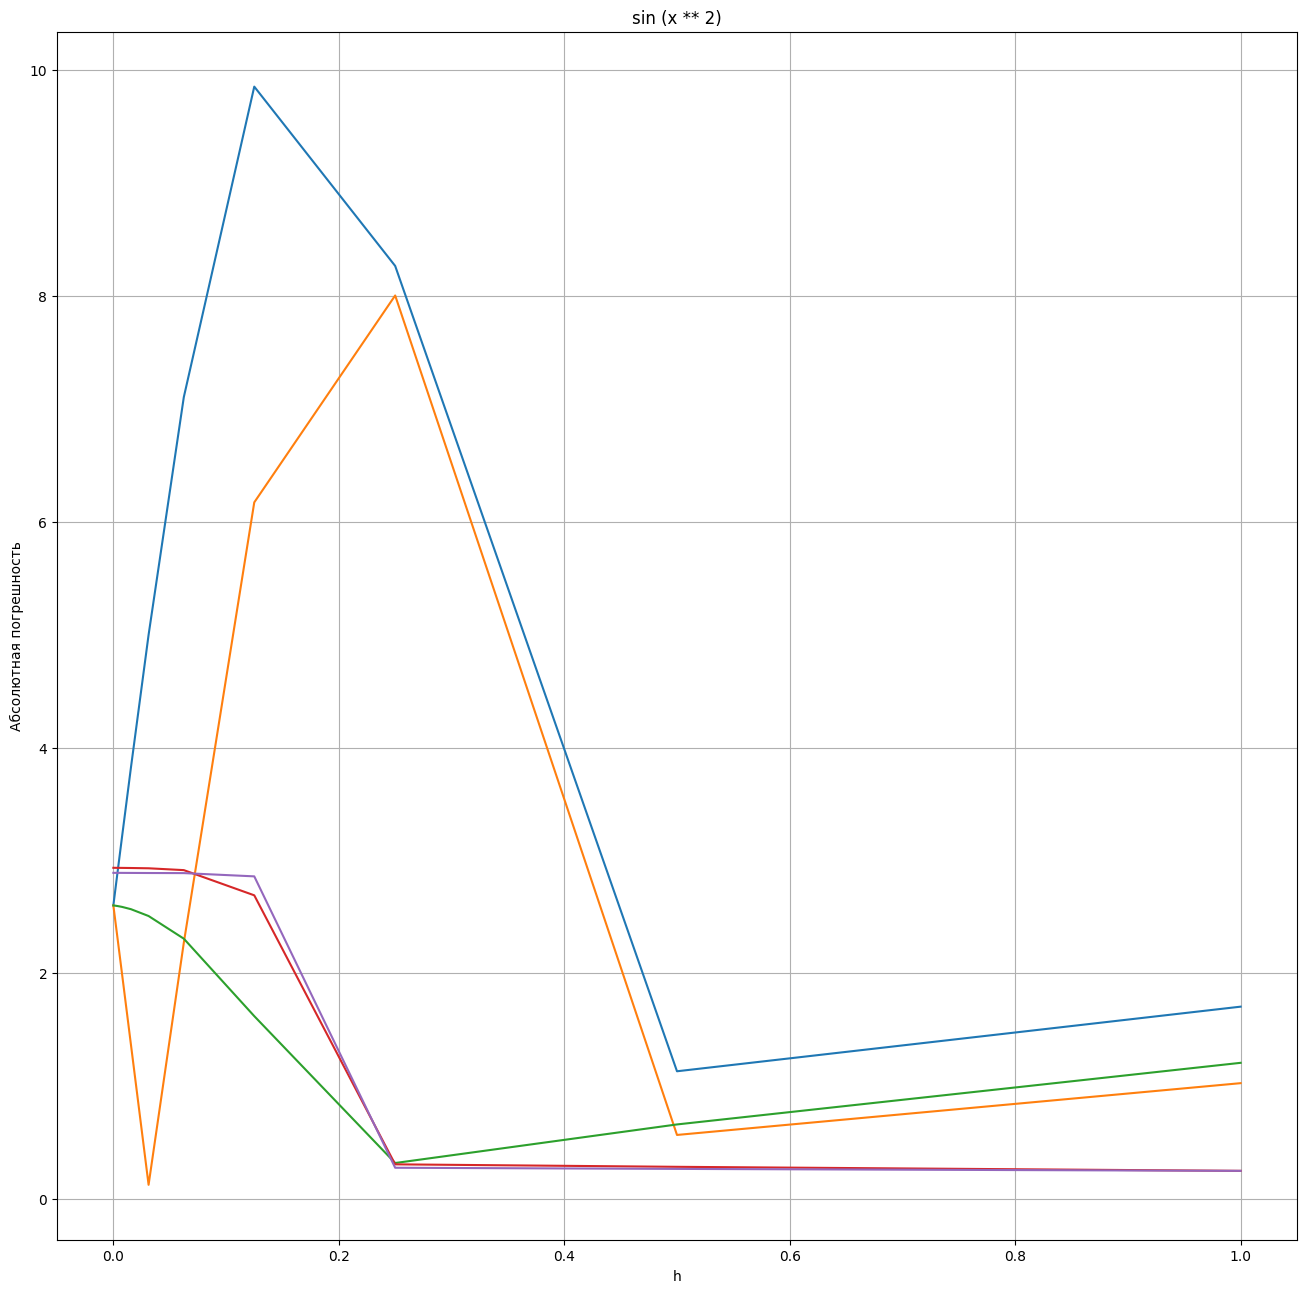

<Figure size 432x288 with 0 Axes>

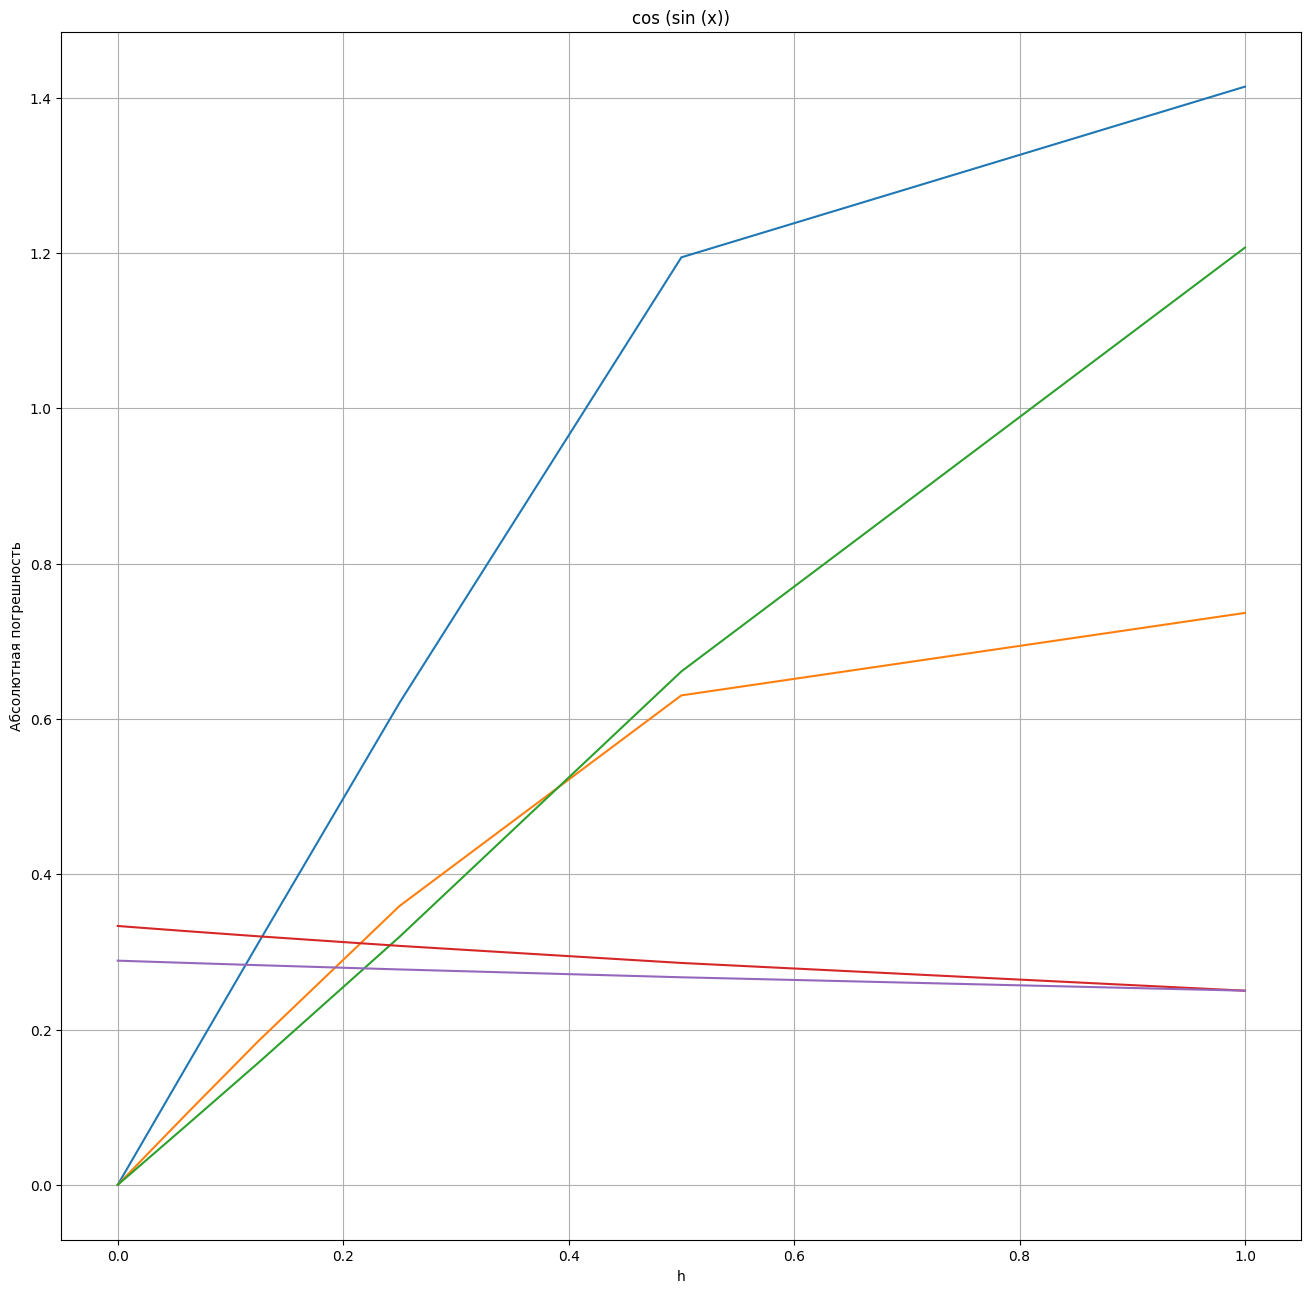

<Figure size 432x288 with 0 Axes>

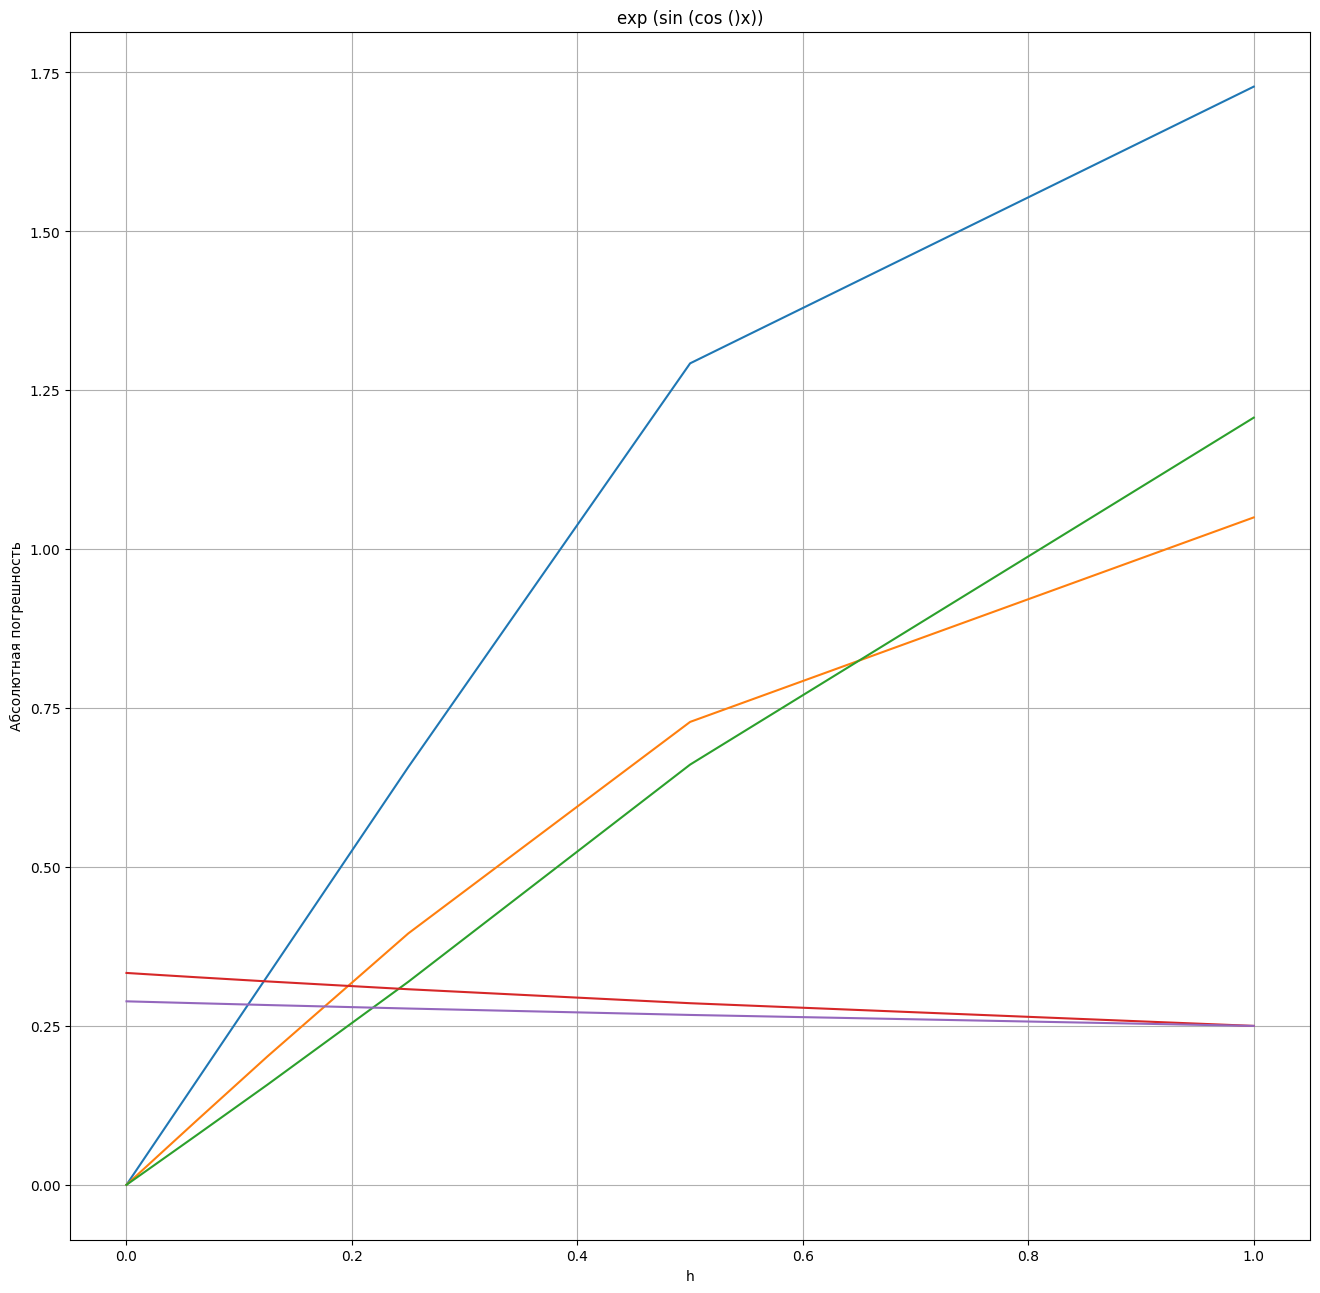

<Figure size 432x288 with 0 Axes>

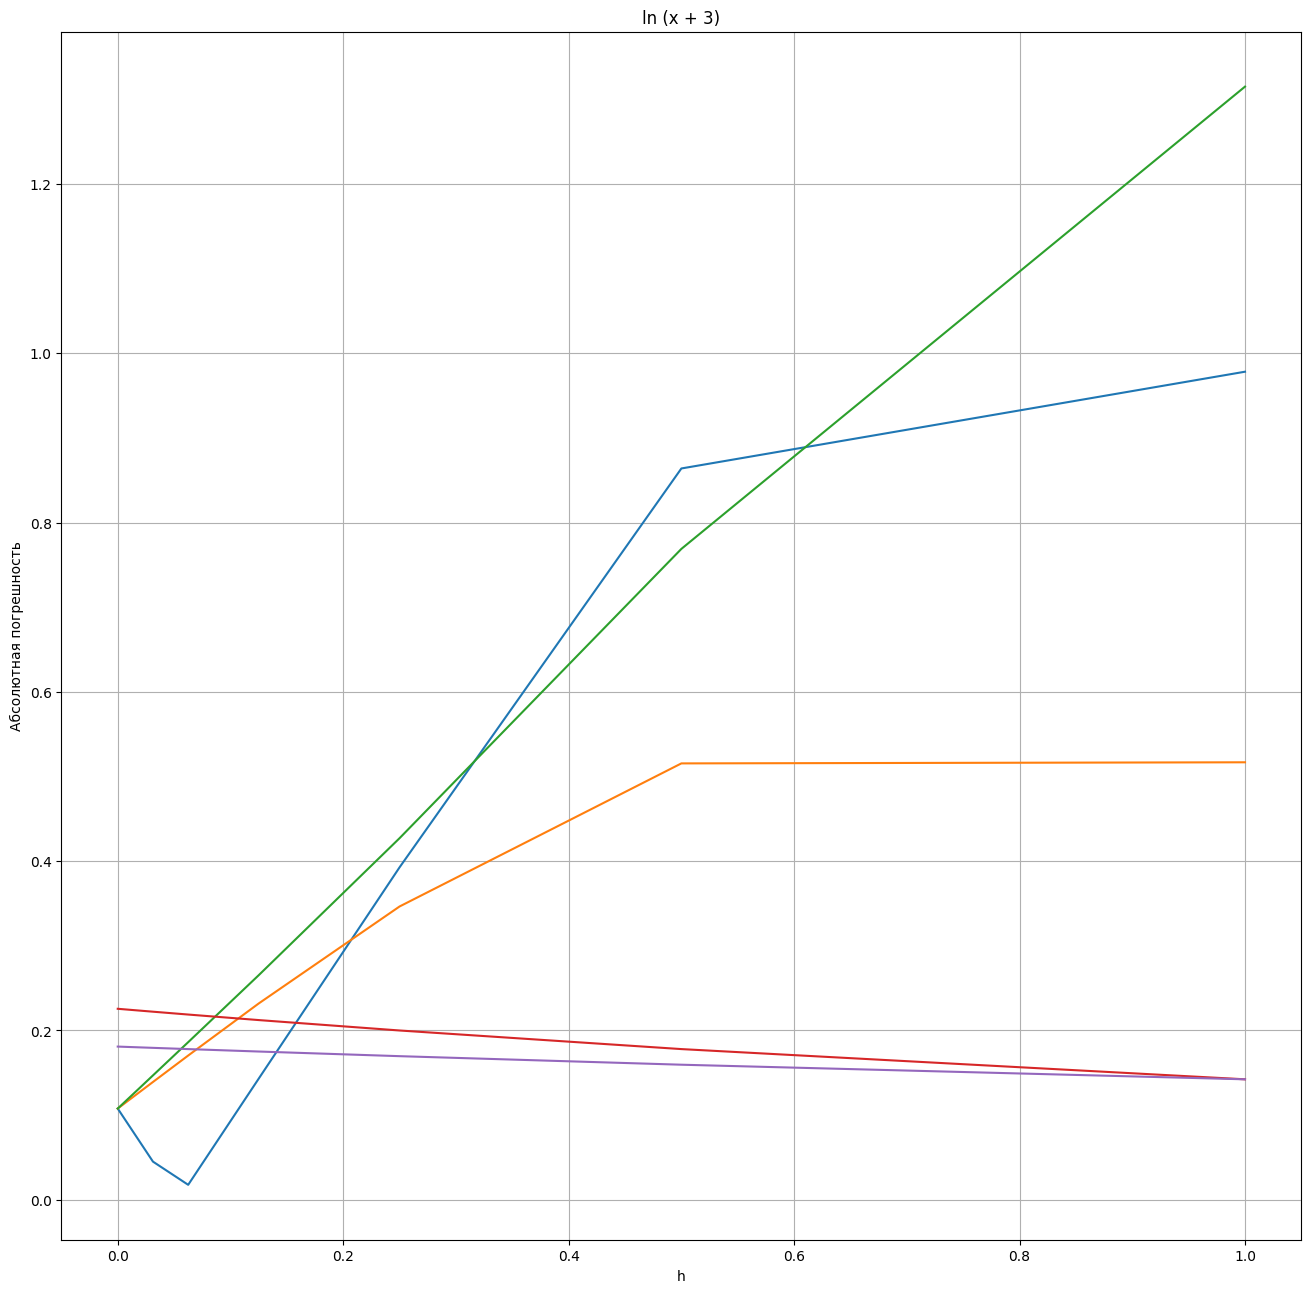

<Figure size 432x288 with 0 Axes>

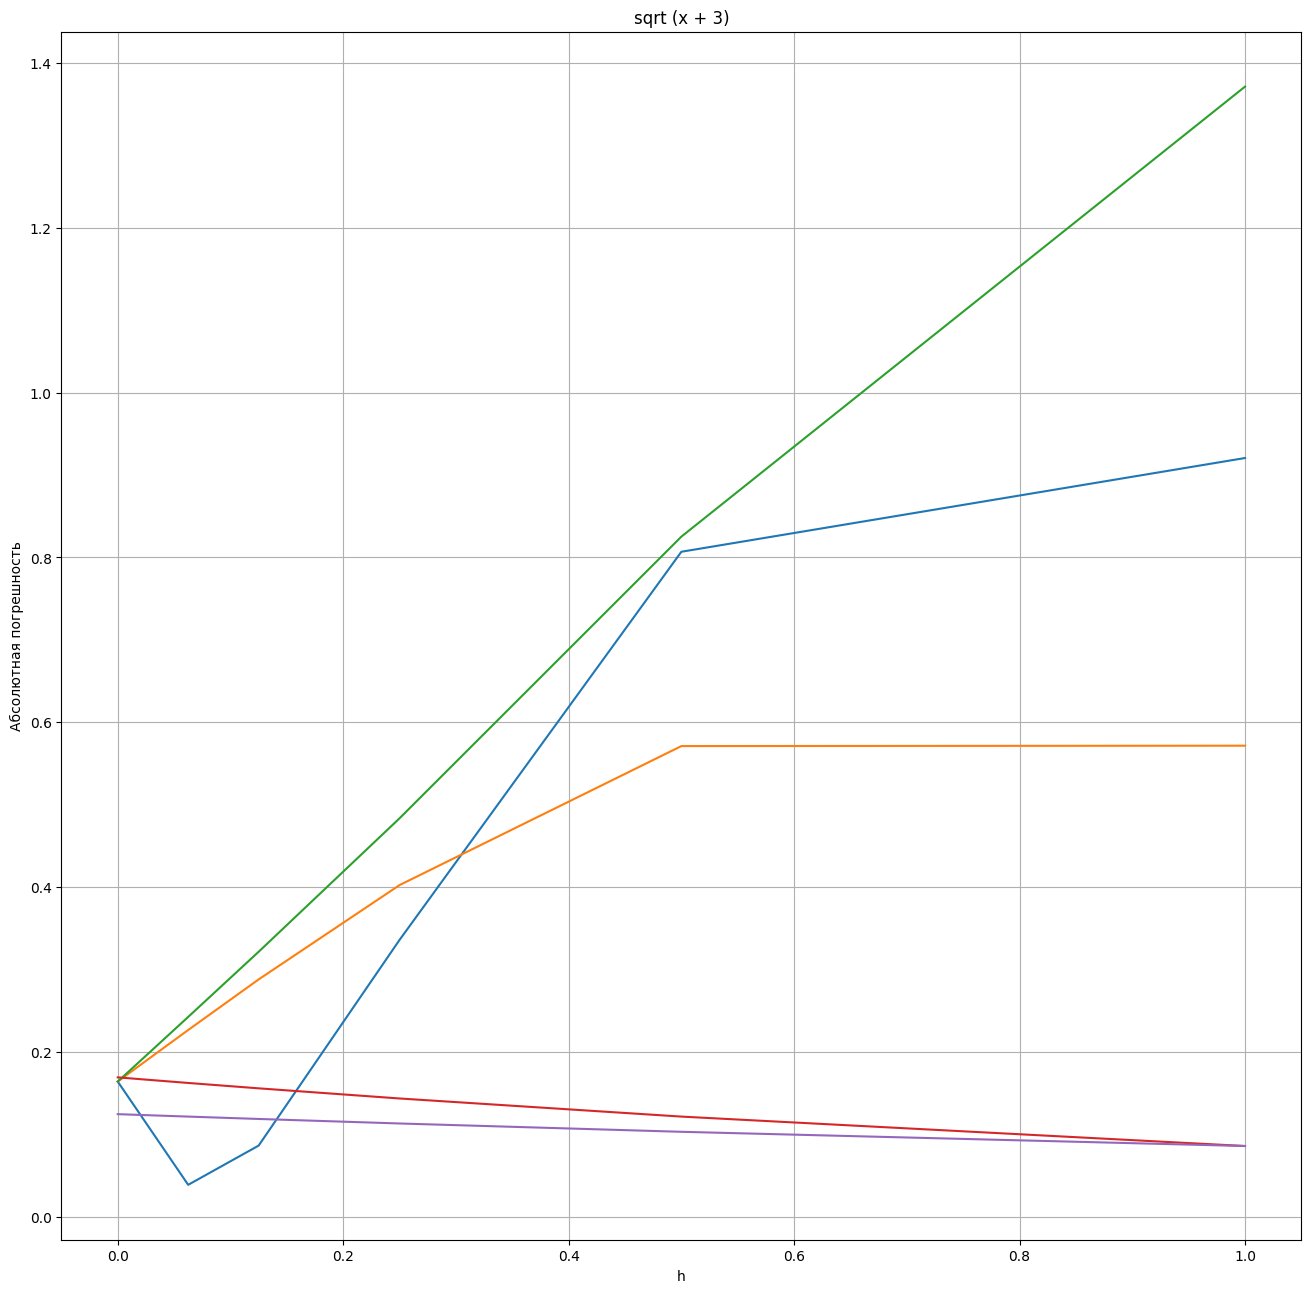

In [19]:
for i in range(5):
    plt.figure ()
    fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

    ax1.set_title (func_names[i])
    ax1.set_ylabel ("Абсолютная погрешность")
    ax1.set_xlabel ("h")

    for j in range(5):
        ax1.plot (h, y_diff[i][j])

    plt.grid ()

    plt.savefig(f"./picturies/graph{i}.png", dpi=100)

    plt.show()